## CLASSIFICATION TASK 

Logistic regression is a classifier model that finds the class of the dependent variable, instead of predicting a continuous value.For example : A model that detects whether an email is spam or not.

Depending on the number of outcomes or the possible classes , logistic regression models are classified into two types. Those are:<b>Binary Classification and Multi class classification.</b>

### Multi-class Logistic Regression with Scikit-Learn 

Below is a Logistic Regression model created to classify a password as Strong , Medium or Weak using the attributes such as its length , usage of numerics and alphabets , vowels and consonants.The implementaion uses two of the python libraries that are 
* Pandas
* Sci-kit Learn


In [1]:
import pandas as pd

In [2]:
#loading the dataset
df= pd.read_csv("SamplePasswords.csv",error_bad_lines = False, warn_bad_lines=False) #filtering badlines from the dataset to prevent ParserErrordata = pd.read_csv("",error_bad_lines = False, warn_bad_lines=False) #filtering badlines from the dataset to prevent ParserError

In [3]:
#Dropping the rows with nan values
data = df.dropna()

In [4]:
#Previewing the Dataset
data.tail()

,password,strength
739,000martin,1
740,a1233210,1
741,zoblin80,1
742,sqsn7a9,0
743,0123one47,1


#### Identifying the classes of the Classifier 

In [5]:
#Adding label to the different classes
Strong = data[data.strength==2]
Medium = data[data.strength==1]
Weak = data[data.strength==0]


### A Bar Plot Representating the available classes

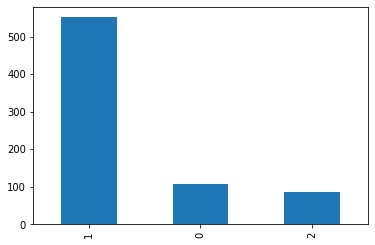

In [6]:
#Plotting the bar plot to view the number of distinct classes in the dataset
barplot = data["strength"].value_counts().plot.bar()

* From the above plotted bar graph we can analyze that the dataset contains most of the passwords that classify themselves as medium 

### Adding independent columns to the dataset

* In order to provide more feature variables to the Logistic Regression model , the passwords have been evaluated depending on various attributes such as its length , the total count of numbers and alphabets used and the overall presence of vowels and consonants.All these attributes of each password has been mesaured and stored into distinct and new columns in the dataframe. 

In [7]:

data['length'] = data['password'].str.len() #Finding length of the character

data['Total Numerics Used'] = data['password'].apply( #Lambda function to count the total numbers present in the password. 
        lambda x: len([str(x) for x in str(x) if x.isdigit()])) 

data['Total Alphabetics Used'] = data['password'].apply( #Likewise,lambda function to count the total alphabets present in the password.
        lambda x: len([x for x in str(x) if x.isalpha()])) 

vowels=['a','e','i','o','u']

data['Vowels'] = data['password'].apply(lambda x: len([x for x in str(x) if x in vowels])) #lambda function to count the presence of vowel characters

data['Consonants'] = data['password'].apply(lambda x: len([x for x in str(x) if x not in vowels and x.isalpha()])) #lambda function to count the presence of consonant characters

In [8]:
#Previewing the newly formed dataset
data.head()

,password,strength,length,Total Numerics Used,Total Alphabetics Used,Vowels,Consonants
0,AVYq1lDE4MgAZfNt,2,16,2,14,0,14
1,u6c8vhow,1,8,2,6,2,4
2,v1118714,1,8,7,1,0,1
3,universe2908,1,12,4,8,4,4
4,as326159,1,8,6,2,1,1


* Now , the distinguishly produced independent variables will be further used for classication of the password based on a multi-class Logistic Regression Model.

### Average of the classes for all cloumns

In [9]:
data.groupby('strength').mean()

,length,Total Numerics Used,Total Alphabetics Used,Vowels,Consonants
strength,,,,,
0,6.629630,1.740741,4.870370,1.555556,3.314815
1,9.613430,3.395644,6.208711,2.226860,3.981851
2,16.188235,3.376471,12.552941,1.741176,10.811765


#### Data Pre-Processing 
* As the password column consists of string data which is an unfit datatype for the machine learning alogrithm they are converted into mavhine readable data character by charcter using a custom tokenizer function and the TfidfVectorizer algorithm form sklearn

In [12]:
## Using TF-IDF algorithm for the Password Column 
def character(input): #custom tokenizer to split into charcater tokens
    char=[]
    for i in input:
        char.append(i)
    return char 

from sklearn.feature_extraction.text import TfidfVectorizer

passwords = character(data['password'])  #tokenizing the column
vectorize = TfidfVectorizer(tokenizer= character) #vectorizing 
passwords = vectorize.fit_transform(passwords)

Pass = passwords.toarray()#changing sparse matrix to np array for compatibility

data['Tokenized Password'] = Pass #adding the tokenized column to the dataset

# Implementation Of Logistic Regression

In [13]:
#Customizing the DataSet
df = data.drop(['password'], axis = 1) #dropping the string column
df = data[['Tokenized Password' , 'length','Total Numerics Used','Vowels','Consonants']] #Aligning the dataset in the required order.

X = df[:]  #data
Y = data.iloc[ : , 1:2 ] #target

In [14]:
from sklearn.model_selection import train_test_split
#Spliting the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
#Creating the Logistic Regression Model

model = LogisticRegression(solver="newton-cg")  #Using the newton-cg solver to mitgate the optimization warning

model.fit(X_train, Y_train.values.reshape(-1,)) #Reshaping to prevent the Dataconversion warning

LogisticRegression(solver='newton-cg')

In [18]:
#Predticing the target 

Y_pred = model.predict(X_test)
print(Y_pred)

[1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 0 1 1 1 1 1 2 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 2
 1 1 1 1 0 1 1 0 1 1 1 1 1 2 1 1 0 1 1 2 0 1 1 0 0 1 1 1 1 1 1 1 1 0 2 2 1
 1 1 0 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 0 1 2 1 1 1 0 1 2 2 2 1 1 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 0 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 0 1 1 0 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 1 1 1 1 1
 1 1 1 1 2 1 0 0 1 1 1 1 1 2 1 0 0 1 0 1 1 2 1 1 1 1 1 0 0 0 1 1 1 2 1 1 1
 0 2 2 0 1 1 1 1 2 1 0 1 1 1 1 1 2 1 1 1 1 1 2 1 0 1 1 2 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 0 1 2 0 1 0 1 0 1 1 1 2 1
 1 1 1 0 0 1 2 1 1 1 1 2 1 1 0 1 1 1 1 0 0 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 0
 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 0 2 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 0 0 1 1 1 2 0 1 2
 0 0 0 1 0 1 1 1 2 1 1 2 1 1 1 0 1 0 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 2 1 2 1 1 0 1 

## Evaluation Metrics

### Accuracy of the Model

In [19]:
print(model.score(X_test,Y_test))

0.9932885906040269


##### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(Y_test , Y_pred)

array([[ 84,   0,   0],
       [  0, 441,   1],
       [  0,   3,  67]], dtype=int64)

In [21]:
print(pd.DataFrame(confusion_matrix(Y_test , Y_pred),columns =['0','1','2']))

    0    1   2
0  84    0   0
1   0  441   1
2   0    3  67


* In this model there are three possible classifications "0": Weak , 1:"Medium" , 3 : "Strong".
* The above model made a total of 596 predictions.
* Out of those predictions , the model classified a total of 84 passwords as Weak , 444 as Medium and 68 as Strong.
* But , in reality there are 84 Weak , 444 Medium and 69 strong passwords.
* Therefore , the classifier is fairly accurate.

In [22]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.99      1.00      1.00       442
           2       0.99      0.96      0.97        70

    accuracy                           0.99       596
   macro avg       0.99      0.98      0.99       596
weighted avg       0.99      0.99      0.99       596



From the above printed report , we can note the various evaluation metrics of the classifier.  